In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.datasets import load_iris
import treePlotter # local

print('Packages loaded')

iris=load_iris() # dataset for classification
boston=load_boston() # dataset for regression

iris
boston

print('Datasets loaded')

Packages loaded
Datasets loaded


In [2]:
class DecisionTree():
    def __init__(self, model):
        self.model = model

    def CARTClassification(self):
        pass

    def CARTRegression(self):
        pass

    def ID3_create(self, train_set, features, labels, tol=[0.1, 2], visible=False):
        """
        create ID3 tree
        :param train_set: m*n ndarray. m: samples, n: features
        :param features: n size vector
        :param labels: m size ndarray
        :param tol: tolerate for pre-pruning
        :return: ID3 tree in dict type
        """
        '''
        three conditions to stop iteration:
          1. all labelss are the same
          2. no feature
          3. info_gain < tol[0], samples > tol[1]. pre-pruning
          4. same training values but different labels
        '''
        train_set = np.array(train_set)
        labels = np.array(labels)

        if len(np.unique(labels)) == 1:  # condition 1
            return labels[0]

        if train_set.shape[1] == 0:  # condition 2
            return np.sort(labels)[-1]  # return the most frequency value

        # condition 3 & 4
        # not finished


        # get best feature
        best_feature_index, best_info_gain = self.ID3_best_feature(train_set, labels)
        best_feature_name = features[best_feature_index]
        print('best selected feature is ', best_feature_name, ', its information gain is ', best_info_gain)

        ID3Tree = {best_feature_name: {}}  # return feature name as a dict key
        # return unique values under the feature and as the node(key)
        tree_nodes = np.unique(train_set.T[best_feature_index])
        # small feature set for dealing feature set depending on its index
        features = np.delete(features, best_feature_index)
        # iteration in these nodes
        for node in tree_nodes:
            train_sample_index = train_set.T[best_feature_index] == node
            node_labels = labels[train_sample_index]
            # small train set with node feature's column equal node value
            node_train_set = self.spilt_dataset(train_set, best_feature_index, node)
            # small train set without node feature
            node_train_set = np.delete(node_train_set, best_feature_index, axis=1)
            # iteration
            ID3Tree[best_feature_name][node] = self.ID3_create(node_train_set, features, node_labels)

        if visible is True:
            treePlotter.ID3_Tree(ID3Tree)
        return ID3Tree

    @staticmethod
    def entropy(array):
        """
        calculate bit entropy
        :param array: 1-D numpy array
        :return: entropy in bit
        """
        count_array = np.unique(array, return_counts=True)[1]  # unique values and its occurrences
        probability = count_array / array.size  # probability of values
        h_p = np.dot(-probability, np.log2(probability))  # entropy
        return h_p

    @staticmethod
    def conditional_entropy(Y, X):
        """
        get conditional entropy H(Y|X)
        :param Y: random variable, 1-D numpy array
        :param X: given random variable, 1-D numpy array
        :return: conditional entropy of Y given X, H(Y|X)
        """
        Y = np.array(Y)
        X = np.array(X)
        hY_X = 0  # initialization
        X_value, X_count = np.unique(X, return_counts=True)  # unique values and its occurrences
        for xi in X_value:
            index = np.argwhere(X == xi)  # get index of X=xi
            p_xi = index.size / X.size  # P(X=xi)
            Yi = Y[index]  # get yi given xi
            hYi_xi = DecisionTree.entropy(np.array(Yi))  # H(Y|X=xi)
            hY_X += p_xi * hYi_xi
        return hY_X

    @staticmethod
    def info_gain(Y, X):
        """
        get information gain G(Y,X)
        :param Y: random variable, 1-D numpy array
        :param X: given random variable, 1-D numpy array
        :return: information gain of Y given X, G(Y|X)
        """
        return DecisionTree.entropy(Y) - DecisionTree.conditional_entropy(Y, X)

    @staticmethod
    def spilt_dataset(dataset, colume, value):
        """
        dataset with small samples
        :param dataset: m*n ndarray
        :param colume:  axis
        :param value: compared value
        :return: l*n ndarray, l<m
        """
        dataset = pd.DataFrame(dataset)
        df = dataset[dataset[colume] == value]

        return np.array(df)

    @staticmethod
    def ID3_best_feature(train_set, labels):
        """
        return the feature with the highest infomation gain
        :param train_set: m*n ndarray. m: samples, n: features
        :param labels: m size ndarray.
        :return: best feature index and its infomation gain
        """
        features = train_set.shape[1]  # number of features
        tmp = np.ones(features) * -1  # store info gain
        for i in range(features):  # calculate info gain of each features
            feature_list = train_set.T[i]
            gain = DecisionTree.info_gain(labels, feature_list)
            tmp[i] = gain
            print("the info gain of %d th feature in ID3 is: %.3f" % (i, gain))
        best_feature = np.argmax(tmp)
        best_info_gain = tmp[best_feature]
        return best_feature, best_info_gain

    @staticmethod
    def classify(tree, sample, features):
        """

        :param tree: dict
        :param sample: 1-d ndarray
        :param features: 1-d ndarray
        :return:
        """
        first_str = list(tree.keys())[0] # root name
        small_tree = tree[first_str] #
        feature_index = features.index(first_str)
        label = 'None'
        for key in small_tree.keys():
            if str(sample[feature_index]) == key:
                if type(small_tree[key]).__name__ == 'dict':
                    label = DecisionTree.classify(small_tree[key], sample, features)
                else:
                    label = small_tree[key]
        return label

Datasets loaded
the info gain of 0 th feature in ID3 is: 0.877
the info gain of 1 th feature in ID3 is: 0.517
the info gain of 2 th feature in ID3 is: 1.446
the info gain of 3 th feature in ID3 is: 1.436
best selected feature is  petal length (cm) , its information gain is  1.4463165236458
the info gain of 0 th feature in ID3 is: 0.544
the info gain of 1 th feature in ID3 is: 0.544
the info gain of 2 th feature in ID3 is: 0.544
best selected feature is  sepal length (cm) , its information gain is  0.5435644431995964
the info gain of 0 th feature in ID3 is: 1.000
the info gain of 1 th feature in ID3 is: 0.500
the info gain of 2 th feature in ID3 is: 0.311
best selected feature is  sepal length (cm) , its information gain is  1.0
the info gain of 0 th feature in ID3 is: 0.571
the info gain of 1 th feature in ID3 is: 0.971
the info gain of 2 th feature in ID3 is: 0.971
best selected feature is  sepal width (cm) , its information gain is  0.9709505944546686
the info gain of 0 th feature in

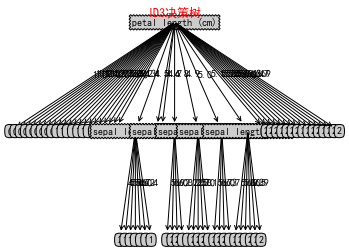

In [3]:
def load_dataset():
    from sklearn.datasets import load_iris
    iris = load_iris()  # dataset for classification
    print('Datasets loaded')
    return iris['data'], iris['feature_names'], iris['target']

train_set,features,labels=load_dataset()
model = DecisionTree('ID3')
tree = model.ID3_create(train_set, features, labels, visible=True)


In [4]:
def read_dataset(filename):
    """
    年龄段：0代表青年，1代表中年，2代表老年；
    有工作：0代表否，1代表是；
    有自己的房子：0代表否，1代表是；
    信贷情况：0代表一般，1代表好，2代表非常好；
    类别(是否给贷款)：0代表否，1代表是
    """
    fr = open(filename,'r')
    all_lines = fr.readlines()  ## list形式,每行为1个str
    #print(all_lines)
    features = ['年龄段','有工作','有自己的房子','信贷情况']
    train_set = []
    labels = []
    for line in all_lines[0:]:
        line = line.strip().split(',')  #以逗号为分割符拆分列表
        train_set.append(line[0:-1])
        labels.append(line[-1])
    return np.array(train_set),features,np.array(labels)

train_set,features,labels = read_dataset('./dataset.txt')
model=DecisionTree('ID3')
tree=model.ID3_create(train_set,features,labels)
model.classify(tree,[0,1,0,0],features)

the info gain of 0 th feature in ID3 is: 0.037
the info gain of 1 th feature in ID3 is: 0.339
the info gain of 2 th feature in ID3 is: 0.438
the info gain of 3 th feature in ID3 is: 0.193
best selected feature is  有自己的房子 , its information gain is  0.43789259626931454
the info gain of 0 th feature in ID3 is: 0.157
the info gain of 1 th feature in ID3 is: 0.881
the info gain of 2 th feature in ID3 is: 0.281
best selected feature is  有工作 , its information gain is  0.8812908992306926


'1'